# Assignment 2- Ben Jakubowski (buj201)

## 1. Preliminaries
### 1.1. Dataset constructions

In [2]:
##1.1.1 Construct design matrix

import numpy as np

np.random.seed(1364)
X = np.random.rand(150, 75)

In [3]:
##1.1.2 Construct a true weight vector

theta_true = np.zeros(75)
theta_true[0:10] = np.random.choice([-10,10], size=10, replace=True)

In [4]:
##1.1.3 Construct response vector

y = np.dot(X, theta_true) + 0.1*np.random.randn(150)

In [5]:
##1.1.4 Split training/test

permute = np.random.permutation(150)
X = X[permute]
y = y[permute]

X_train, y_train = X[0:80,], y[0:80]
X_val, y_val = X[80:100,], y[80:100]
X_test, y_test = X[100:150,], y[100:150]

### 1.2. Experiments with Ridge Regression

In [6]:
##1.2.1 Run ridge regression 

import numpy
from scipy.optimize import minimize

(N,D) = X_train.shape
X = X_train
y = y_train


w = numpy.random.rand(D,1)

def ridge(Lambda):
    def ridge_obj(theta):
        return ((np.linalg.norm(np.dot(X,theta) - y))**2)/(2*N) + Lambda*(np.linalg.norm(theta))**2
    return ridge_obj

def compute_loss(Lambda, theta, val=True):
    if val==True:
        return ((np.linalg.norm(np.dot(X_val,theta) - y_val))**2)/(2*X_val.shape[0])
    else:
        return ((np.linalg.norm(np.dot(X,theta) - y))**2)/(2*N)

w_opts = {}
loss_array = np.zeros((100,3))
lambdas = np.linspace(0.000001, 0.0001, 100)
print 'Lambda\tTrain loss\tVal loss'
for i in range(100):
    Lambda = lambdas[i];
    w_opt = minimize(ridge(Lambda), w)
    train_loss = compute_loss(Lambda, w_opt.x, val=False)
    val_loss = compute_loss(Lambda, w_opt.x, val=True)
    loss_array[i,] = np.array([Lambda, train_loss, val_loss])
    print Lambda, train_loss, val_loss
    w_opts[str(Lambda)] = w_opt.x

Lambda	Train loss	Val loss
1e-06 0.000176943206147 0.13367126787
2e-06 0.000180078950469 0.123000934743
3e-06 0.00018519265538 0.113348362788
4e-06 0.000192197523344 0.104664848192
5e-06 0.000201013280041 0.0968827538049
6e-06 0.00021155836255 0.0900032342051
7e-06 0.000223800614149 0.0836889894091
8e-06 0.000237591653214 0.0784603387534
9e-06 0.000252908644897 0.0739910888269
1e-05 0.000269686285448 0.0702479536749
1.1e-05 0.000287869930729 0.0671959473429
1.2e-05 0.000307411290354 0.0648054183877
1.3e-05 0.000328242464015 0.0630439474128
1.4e-05 0.00035031928528 0.061885241786
1.5e-05 0.000373606909712 0.0613172197258
1.6e-05 0.000398041387529 0.0612836581035
1.7e-05 0.000423588332785 0.0617761931967
1.8e-05 0.000450217184858 0.062787214209
1.9e-05 0.000477911462335 0.0643009403759
2e-05 0.000506561415843 0.0662366429585
2.1e-05 0.000536173111314 0.0686120293693
2.2e-05 0.000566714889568 0.0714085494659
2.3e-05 0.000598155567764 0.074607706263
2.4e-05 0.000630462191035 0.078192557353

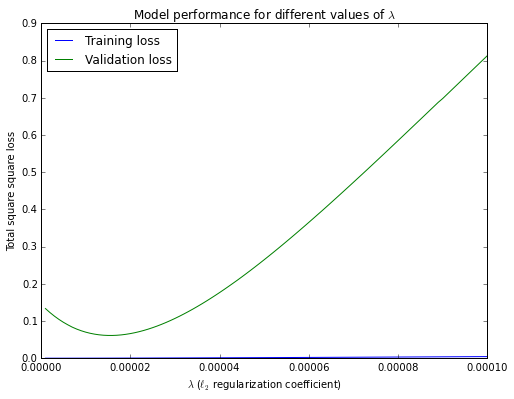

In [7]:
##1.2.1 Run ridge regression CONTINUED

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8,6))
plt.plot(loss_array[:,0], loss_array[:,1], label='Training loss')
plt.plot(loss_array[:,0], loss_array[:,2], label='Validation loss')
plt.legend(loc='best')
plt.ylabel('Total square square loss')
plt.xlabel(r'$\lambda$ ($\ell_2$ regularization coefficient)')
plt.title('Model performance for different values of $\lambda$')
plt.savefig('figures/1_2_1.png')

In [19]:
##1.2.1 Run ridge regression CONTINUED

print 'Num w[0:10] not zero: ', np.sum(np.abs(w_opts['1.6e-05'][0:10]) != 0.0)
print 'Num w[0:10] not within 1e-3 of zero: ', np.sum(np.abs(w_opts['1.6e-05'][0:10]) > 1.0e-3)
print 'Num w[0:10] not within 1e-2 of zero: ', np.sum(np.abs(w_opts['1.6e-05'][0:10]) > 1.0e-2)
print 'Num w[0:10] not within 1e-2 of zero: ', np.sum(np.abs(w_opts['1.6e-05'][0:10]) > 1.0e-1)
print 'Num w[10:] zero: ', np.sum(np.abs(w_opts['1.6e-05'][10:]) == 0.0)
print 'Num w[10:] within 1e-3 of zero: ', np.sum(np.abs(w_opts['1.6e-05'][10:]) <= 1.0e-03)
print 'Num w[10:] within 1e-2 of zero: ', np.sum(np.abs(w_opts['1.6e-05'][10:]) <= 1.0e-02)
print 'Num w[10:] within 1e-2 of zero: ', np.sum(np.abs(w_opts['1.6e-05'][10:]) <= 1.0e-01)

Num w[0:10] not zero:  10
Num w[0:10] not within 1e-3 of zero:  10
Num w[0:10] not within 1e-2 of zero:  10
Num w[0:10] not within 1e-2 of zero:  10
Num w[10:] zero:  0
Num w[10:] within 1e-3 of zero:  0
Num w[10:] within 1e-2 of zero:  5
Num w[10:] within 1e-2 of zero:  37


## 2. Coordinate Descent for Lasso
### 2.1. Experiments with the Shooting Algorithm

In [27]:
##2.1.1 Implement looping shooting algorithm

def drop_j(input_array, j):
    '''
    Takes a 1 or 2 dimensional input_array and an index j.
    If input_array a 1D array:
        - returns an array of lenght n-1 with the jth entry dropped.
    If input_array a 2D array:
        - returns an nx(d-1) 2D array (i.e. jth column dropped)
    
    Args:
        input_array - A numpy array of length n
        j - an index to drop
        
    Returns:
        dropped_array - a numpy array of the form [0,...,j-1,j+1,...,j]
    '''
    if len(input_array.shape) == 1:
        n = len(input_array)
        if j == 0:
            return input_array[1:n+1]
        elif j<n:
            return input_array[np.concatenate((np.arange(0,j),np.arange(j+1,n)), axis=0)]
        elif j == n:
            return input_array[0:n]
        else:
            print "J > len(input_array). Returning input_array"
            return input_array
    elif len(input_array.shape) == 2:
        n = input_array.shape[1]
        if j == 0:
            return input_array[:,1:n+1]
        elif j<n:
            return input_array[:, np.concatenate((np.arange(0,j),np.arange(j+1,n)), axis=0)]
        elif j == n:
            return input_array[:, 0:n]
        else:
            print "J > Number of attributes. Returning input_array"
            return input_array

In [28]:
##2.1.1 Implement looping shooting algorithm CONTINUED

def w_j_hat(a_j, c_j, lambda_reg):
    if c_j < -lambda_reg:
        return (c_j + lambda_reg)/a_j
    elif np.abs(c_j) <= lambda_reg:
        return 0.0
    elif c_j > lambda_reg:
        return (c_j - lambda_reg)/a_j

In [44]:
##2.1.1 Implement looping shooting algorithm CONTINUED

def lass_solver_looping(lambda_reg, starting_point, num_iter=100, tol=1.0e-6):
    w_1 = starting_point.copy()
    w_0 = w_1.copy()
    iteration = 1
    within_tol = False
    while (within_tol == False and iteration <= num_iter):
        for j in range(D):
            a_j = 0.0
            c_j = 0.0
            w_minus_j = drop_j(w_1, j)
            for i in range(N):
                a_j += 2.0 * X_train[i,j]**2   
                c_j += 2.0 * X_train[i,j]*(y_train[i] - np.dot(w_minus_j,drop_j(X_train[i,:],j)))
            w_1[j] = w_j_hat(a_j, c_j, lambda_reg)
        within_tol = (np.dot(w_1 - w_0, w_1 - w_0)**(0.5) < tol)
        w_0 = w_1.copy()
        iteration += 1
    return w_1

In [46]:
##2.1.1 Implement looping shooting algorithm 

def find_opt_lambda(solver=lass_solver_vectorized, n_tested_lambdas=50, starting_point=w_opts['1.6e-05'], num_iter=100, tol=1.0e-6):
    n_tested_lambdas = n_tested_lambdas
    loss_values = np.zeros((n_tested_lambdas,3))
    lambda_regs_for_lass = np.logspace(-1,1, n_tested_lambdas)
    for i in range(len(lambda_regs_for_lass)):
        lambda_reg= lambda_regs_for_lass[i]
        w_opt = solver(lambda_reg, w_opts['1.6e-05'], num_iter)
        train_loss = 1.0/(2*X_train.shape[0])*np.dot(np.dot(X_train, w_opt) - y_train,np.dot(X_train, w_opt) - y_train)
        val_loss = 1.0/(2*X_val.shape[0])*np.dot(np.dot(X_val, w_opt) - y_val,np.dot(X_val, w_opt) - y_val)
        loss_values[i,] = [lambda_reg, train_loss, val_loss]
    plt.figure(figsize=(8,6))
    plt.xscale('log')
    plt.ylim((0,0.05))
    plt.plot(loss_values[:,0], loss_values[:,1], label='Training loss')
    plt.plot(loss_values[:,0], loss_values[:,2], label='Validation loss')
    plt.legend(loc='upper left')
    plt.xlabel(r'$\lambda$ (log scale)')
    plt.ylabel('Square loss')
    alg_type = solver.__name__.split('_')[-1]
    plt.title('Model performance for the {} algorithm'.format(alg_type))
    plt.savefig('figures/2_1_{}.png'.format(alg_type))
    return loss_values

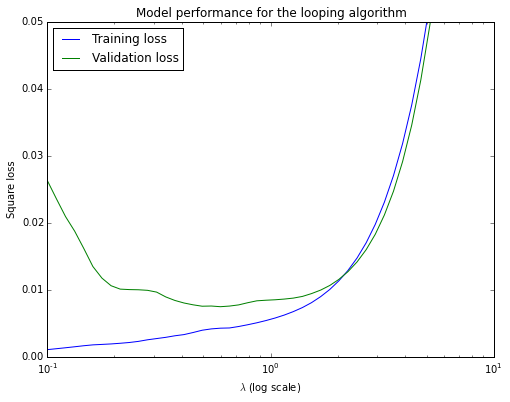

In [47]:
##2.1.1 Implement looping shooting algorithm CONTINUED

non_vectorized = find_opt_lambda(solver = lass_solver_looping)

In [54]:
##2.1.1 Implement looping shooting algorithm CONTINUED

non_vectorized[non_vectorized[:,2] <=0.015]

array([[  1.59985872e-01,   1.80424625e-03,   1.35111054e-02],
       [  1.75751062e-01,   1.87268952e-03,   1.17678734e-02],
       [  1.93069773e-01,   1.94403512e-03,   1.06370775e-02],
       [  2.12095089e-01,   2.04291499e-03,   1.01300831e-02],
       [  2.32995181e-01,   2.15824068e-03,   1.00601019e-02],
       [  2.55954792e-01,   2.32521806e-03,   1.00334270e-02],
       [  2.81176870e-01,   2.56277544e-03,   9.94978722e-03],
       [  3.08884360e-01,   2.74636827e-03,   9.68406436e-03],
       [  3.39322177e-01,   2.92901040e-03,   8.96601461e-03],
       [  3.72759372e-01,   3.16123358e-03,   8.43995319e-03],
       [  4.09491506e-01,   3.33877045e-03,   8.05931179e-03],
       [  4.49843267e-01,   3.64865446e-03,   7.78599631e-03],
       [  4.94171336e-01,   3.99127696e-03,   7.57654951e-03],
       [  5.42867544e-01,   4.18971275e-03,   7.60494586e-03],
       [  5.96362332e-01,   4.29628358e-03,   7.50516297e-03],
       [  6.55128557e-01,   4.32961307e-03,   7.5987639

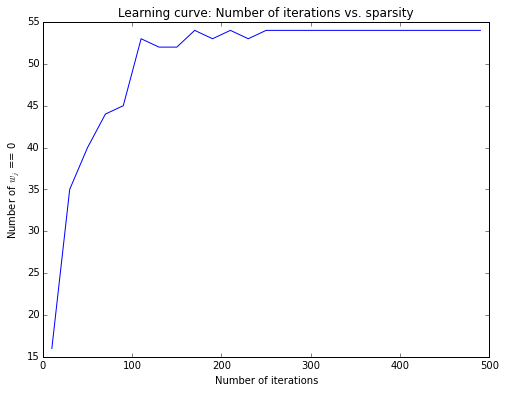

In [52]:
##2.1.2 Analyze sparsity of solution from looping shooting algorithm

num_iters = range(10,510,20)
learning_curve = np.zeros((len(num_iters),2))
for i in range(len(num_iters)):
    looping_ws = lass_solver_looping(np.logspace(-1,1, 50)[19], w_opts['1.6e-05'], num_iter=num_iters[i])
    learning_curve[i,:] = [num_iters[i], np.sum(np.abs(looping_ws) == 0.0)]

plt.figure(figsize=(8,6))
plt.plot(learning_curve[:,0], learning_curve[:,1])
plt.title('Learning curve: Number of iterations vs. sparsity')
plt.xlabel('Number of iterations')
plt.ylabel(r'Number of $w_j$ == 0')
plt.savefig('figures/2_1_2.png')

In [57]:
##2.1.2 Analyze sparsity of solution from looping shooting algorithm CONTINUED

looping_ws = lass_solver_looping(np.logspace(-1,1, 50)[19], w_opts['1.6e-05'], 300)
print 'Num w[0:10] not zero: ', np.sum(np.abs(looping_ws[0:10]) != 0.0)
print 'Num w[0:10] not within 1e-3 of zero: ', np.sum(np.abs(looping_ws[0:10]) > 1e-3)
print 'Num w[10:] zero: ', np.sum(np.abs(looping_ws[10:]) == 0.0)
print 'Num w[10:] within 1e-3 of zero: ', np.sum(np.abs(looping_ws[10:]) < 1e-3)
print len(looping_ws)

Num w[0:10] not zero:  10
Num w[0:10] not within 1e-3 of zero:  10
Num w[10:] zero:  54
Num w[10:] within 1e-3 of zero:  54
75


In [58]:
##2.1.2 Analyze sparsity of solution from looping shooting algorithm CONTINUED

print np.min(np.abs(looping_ws[0:10])), np.max(np.abs(looping_ws[0:10]))
print np.max(np.abs(looping_ws[10:]))

9.89817449795 10.0311617974
0.0548268082128


In [74]:
##2.1.3 Implement homotopy method for looping shooting algorithm


def homotopy_method(solver = lass_solver_looping, lambda_regs = np.logspace(-1,1, 50), tol=1.0e-6):
    starting_point = w_opts['1.6e-05']
    loss_values = np.zeros((len(lambda_regs),3))
    
    for i in range(len(lambda_regs)):
        lambda_reg = lambda_regs[i]
        w_opt = solver(lambda_reg, starting_point, tol=tol)
        train_loss = 1.0/(2*X_train.shape[0])*np.dot(np.dot(X_train, w_opt) - y_train,np.dot(X_train, w_opt) - y_train)
        val_loss = 1.0/(2*X_val.shape[0])*np.dot(np.dot(X_val, w_opt) - y_val,np.dot(X_val, w_opt) - y_val)
        loss_values[i,] = [lambda_reg, train_loss, val_loss]
        starting_point = w_opt
        
    return loss_values

In [62]:
##2.1.3 Implement homotopy method for looping shooting algorithm

test_homotopy = homotopy_method()

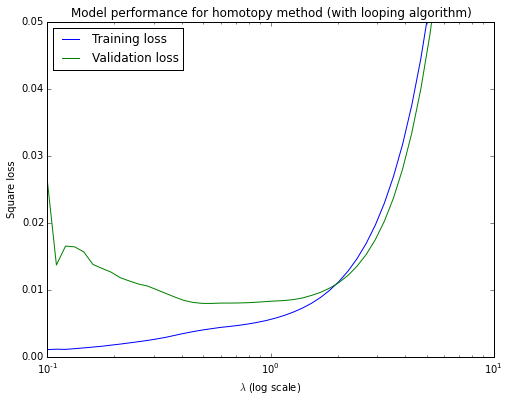

In [70]:
##2.1.3 Implement homotopy method for looping shooting algorithm

plt.figure(figsize=[8,6])
plt.xscale('log')
plt.ylim((0,0.05))
plt.xlim((1e-1,1e1))
plt.plot(test_homotopy[:,0], test_homotopy[:,1], label='Training loss')
plt.plot(test_homotopy[:,0], test_homotopy[:,2], label='Validation loss')
plt.legend(loc='upper left')
plt.xlabel(r'$\lambda$ (log scale)')
plt.ylabel('Square loss')
plt.title('Model performance for homotopy method (with looping algorithm)')
plt.savefig('figures/2_1_3.png')

In [73]:
##2.1.3 Implement homotopy method for looping shooting algorithm

def test_speed_looping_no_homotopy(solver=lass_solver_looping, n_tested_lambdas=50, starting_point=w_opts['1.6e-05'], num_iter=100, tol=1.0e-6):
    n_tested_lambdas = n_tested_lambdas
    loss_values = np.zeros((n_tested_lambdas,3))
    lambda_regs_for_lass = np.logspace(-1,1, n_tested_lambdas)
    for i in range(len(lambda_regs_for_lass)):
        lambda_reg= lambda_regs_for_lass[i]
        w_opt = solver(lambda_reg, w_opts['1.6e-05'], num_iter)
        train_loss = 1.0/(2*X_train.shape[0])*np.dot(np.dot(X_train, w_opt) - y_train,np.dot(X_train, w_opt) - y_train)
        val_loss = 1.0/(2*X_val.shape[0])*np.dot(np.dot(X_val, w_opt) - y_val,np.dot(X_val, w_opt) - y_val)
        loss_values[i,] = [lambda_reg, train_loss, val_loss]
    return loss_values

In [72]:
##2.1.3 Implement homotopy method for looping shooting algorithm

%timeit test_speed_looping_no_homotopy()
%timeit homotopy_method()

1 loops, best of 3: 4min 17s per loop
1 loops, best of 3: 4min 5s per loop


In [75]:
##2.1.3 Implement homotopy method for looping shooting algorithm

%timeit test_speed_looping_no_homotopy(tol=1.0e-3)
%timeit homotopy_method(tol=1.0e-3)

1 loops, best of 3: 4min 44s per loop
1 loops, best of 3: 1min 16s per loop


In [45]:
##2.1.4 Implement vectorized shooting algorithm

def lass_solver_vectorized(lambda_reg, starting_point, num_iter=100, tol=1.0e-6):
    w_1 = starting_point.copy()
    w_0 = w_1.copy()
    iteration = 1
    within_tol = False
    while (within_tol == False and iteration <= num_iter):
        for j in range(D):
            a_j = 2.0 * np.sum(X_train[:,j]**2)    
            c_j = 2.0 * np.sum(X_train[:,j]*(y_train - np.dot(drop_j(X_train,j), drop_j(w_1, j))))
            w_1[j] = w_j_hat(a_j, c_j, lambda_reg)
        within_tol = (np.dot(w_1 - w_0, w_1 - w_0)**(0.5) < tol)
        w_0 = w_1.copy()
        iteration += 1
    return w_1

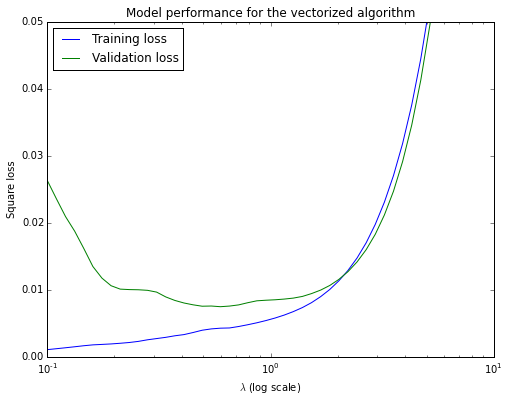

In [95]:
##2.1.4 Implement vectorized shooting algorithm CONTINUED

vectorized = find_opt_lambda()

In [96]:
##2.1.4 Implement vectorized shooting algorithm CONTINUED

vectorized[vectorized[:,2] <=0.015]

array([[  1.59985872e-01,   1.80424625e-03,   1.35111054e-02],
       [  1.75751062e-01,   1.87268952e-03,   1.17678734e-02],
       [  1.93069773e-01,   1.94403512e-03,   1.06370775e-02],
       [  2.12095089e-01,   2.04291499e-03,   1.01300831e-02],
       [  2.32995181e-01,   2.15824068e-03,   1.00601019e-02],
       [  2.55954792e-01,   2.32521806e-03,   1.00334270e-02],
       [  2.81176870e-01,   2.56277544e-03,   9.94978722e-03],
       [  3.08884360e-01,   2.74636827e-03,   9.68406436e-03],
       [  3.39322177e-01,   2.92901040e-03,   8.96601461e-03],
       [  3.72759372e-01,   3.16123358e-03,   8.43995319e-03],
       [  4.09491506e-01,   3.33877045e-03,   8.05931179e-03],
       [  4.49843267e-01,   3.64865446e-03,   7.78599631e-03],
       [  4.94171336e-01,   3.99127696e-03,   7.57654951e-03],
       [  5.42867544e-01,   4.18971275e-03,   7.60494586e-03],
       [  5.96362332e-01,   4.29628358e-03,   7.50516297e-03],
       [  6.55128557e-01,   4.32961307e-03,   7.5987639

In [76]:
##2.1.4 Implement vectorized shooting algorithm CONTINUED

%timeit lass_solver_vectorized(0.596, w_opts['1.6e-05'], num_iter=100)
%timeit lass_solver_looping(0.596, w_opts['1.6e-05'], num_iter=100)

1 loops, best of 3: 332 ms per loop
1 loops, best of 3: 4.62 s per loop


In [77]:
##2.1.4 Implement vectorized shooting algorithm CONTINUED

compare_coef = lass_solver_vectorized(0.596, w_opts['1.6e-05'], num_iter=1000)

In [78]:
##2.1.4 Implement vectorized shooting algorithm CONTINUED

compare_coef

array([  1.00311294e+01,  -9.95082905e+00,   9.89820960e+00,
        -9.90223613e+00,  -9.89912976e+00,  -1.00294288e+01,
        -9.96416719e+00,  -1.00117453e+01,  -9.99774458e+00,
        -9.98069794e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,  -1.24259844e-02,
         0.00000000e+00,   0.00000000e+00,  -5.48065658e-02,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,  -1.58550337e-03,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,  -3.89355671e-02,   0.00000000e+00,
        -2.10523405e-02,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,  -1.30452103e-02,
         0.00000000e+00,   0.00000000e+00,  -3.17885380e-03,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,

## 5. Project SGD via Variable Splitting

In [79]:
##5.1 Implement projected SGD via variable splitting for lasso

def projected_SGD_gradients(index, lambda_reg, theta_plus, theta_minus):
    x_i = X_train[index,:]
    y_i = y_train[index]
    grad_theta_plus = 2*X_train.shape[0]*x_i*(np.dot((theta_plus - theta_minus), x_i)-y_i) + lambda_reg
    grad_theta_minus = -2*X_train.shape[0]*x_i*(np.dot((theta_plus - theta_minus), x_i)-y_i) + lambda_reg
    return grad_theta_plus, grad_theta_minus

In [80]:
##5.1 Implement projected SGD via variable splitting for lasso CONTINUED

def update_thetas(index, lambda_reg, theta_plus, theta_minus, alpha):
    grad_theta_plus, grad_theta_minus = projected_SGD_gradients(index, lambda_reg, theta_plus, theta_minus)
    theta_plus = theta_plus - alpha*grad_theta_plus
    theta_plus = np.where(theta_plus>0, theta_plus, np.zeros_like(theta_plus))
    theta_minus = theta_minus - alpha*grad_theta_minus
    theta_minus = np.where(theta_minus>0, theta_minus, np.zeros_like(theta_minus))
    return theta_plus, theta_minus

In [88]:
##5.1 Implement projected SGD via variable splitting for lasso CONTINUED

def projected_sgd(alpha=0.1, lambda_reg=1, num_iter=1000):
    theta_minus = np.where(w_opts['1.6e-05']<0, w_opts['1.6e-05'].copy(), np.zeros_like(w_opts['1.6e-05']))
    theta_plus = np.where(w_opts['1.6e-05']>0, w_opts['1.6e-05'].copy(), np.zeros_like(w_opts['1.6e-05']))
    
    t = 1.0 ##Step counter    
    ##Parse alpha
    
    if type(alpha) == float:
        alpha = alpha
        alpha_fun = (lambda t: alpha)
    
    elif alpha == "1/sqrt(t)":
        alpha = 1.0/np.sqrt(t)
        alpha_fun = (lambda t: 1/np.sqrt(t))
    
    elif alpha == "1/t":
        alpha = 1.0/t
        alpha_fun = (lambda t: 1/t)
        
    else:
        raise ValueError('Alpha is (1) a float; (2) "1/sqrt(t)"; or (3) "1/t"')   
        
    np.random.seed(6354135)
    for iteration in range(num_iter):
        ##Shuffle the training data
        permute = np.random.permutation(np.arange(X_train.shape[0]))
        
        for index in permute:
            theta_plus, theta_minus = update_thetas(index, lambda_reg, theta_plus, theta_minus, alpha)
            t += 1.0
            alpha = alpha_fun(t)
    
    w_opt = theta_plus - theta_minus
    train_loss = 1.0/(2*X_train.shape[0])*np.dot(np.dot(X_train, w_opt) - y_train,np.dot(X_train, w_opt) - y_train)
    val_loss = 1.0/(2*X_val.shape[0])*np.dot(np.dot(X_val, w_opt) - y_val,np.dot(X_val, w_opt) - y_val)
    loss_vals = [lambda_reg, train_loss, val_loss]
    
    return loss_vals

In [111]:
##5.1 Implement projected SGD via variable splitting for lasso CONTINUED

def make_projected_sgd_plots(lambda_regs, alpha = '1/t', num_iter=1000):
    num_lambdas = len(lambda_regs)
    loss_vals = np.zeros((num_lambdas, 3))
    for index in np.arange(num_lambdas):
        lambda_reg = lambda_regs[index]
        loss_val = projected_sgd(alpha, lambda_reg, num_iter)
        loss_vals[index,:] = loss_val
    
    plt.figure(figsize=(8,6))
    plt.xscale('log')
    plt.ylim((0,0.05))
    plt.xlim((1e-1,1e1))
    plt.xlabel(r'$\lambda$')
    plt.ylabel('Squared loss')
    plt.title(r'Using projected SGD to optimize $\lambda$')
    plt.plot(loss_vals[:,0], loss_vals[:,1], label='Training loss')
    plt.plot(loss_vals[:,0], loss_vals[:,2], label='Validation loss')
    plt.legend(loc='best')
    plt.savefig('figures/5_1.png')
    return loss_vals

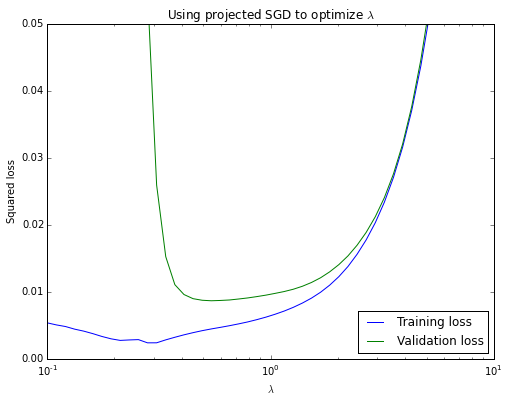

In [114]:
##5.1 Implement projected SGD via variable splitting for lasso CONTINUED

lambda_regs_for_lass = np.logspace(-1,1,50)
projected_SGD_loss = make_projected_sgd_plots(lambda_regs_for_lass, alpha=0.0001)

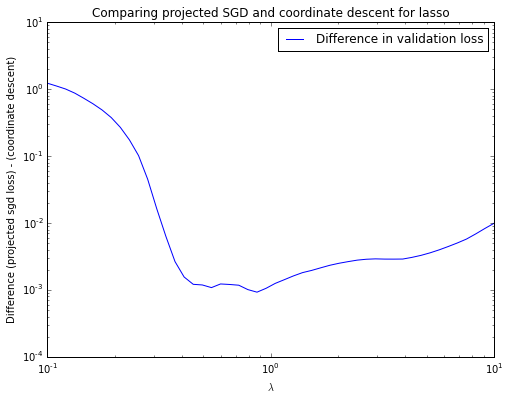

In [115]:
##5.1 Implement projected SGD via variable splitting for lasso CONTINUED

plt.figure(figsize=(8,6))
plt.plot(vectorized[:,0], projected_SGD_loss[:,2] - vectorized[:,2], label='Difference in validation loss')
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$\lambda$')
plt.ylabel('Difference (projected sgd loss) - (coordinate descent)')
plt.title('Comparing projected SGD and coordinate descent for lasso')
plt.legend(loc='upper right')
plt.savefig('figures/5_2.png')

In [117]:
##5.2 Analyze sparsity of solution from  projected SGD via variable splitting

def projected_sgd_thetas(alpha=0.0001, lambda_reg=np.logspace(-1,1,50)[19], num_iter=1000):
    theta_minus = np.where(w_opts['1.6e-05']<0, w_opts['1.6e-05'].copy(), np.zeros_like(w_opts['1.6e-05']))
    theta_plus = np.where(w_opts['1.6e-05']>0, w_opts['1.6e-05'].copy(), np.zeros_like(w_opts['1.6e-05']))
    
    t = 1.0 ##Step counter    
    ##Parse alpha
    
    if type(alpha) == float:
        alpha = alpha
        alpha_fun = (lambda t: alpha)
    
    elif alpha == "1/sqrt(t)":
        alpha = 1.0/np.sqrt(t)
        alpha_fun = (lambda t: 1/np.sqrt(t))
    
    elif alpha == "1/t":
        alpha = 1.0/t
        alpha_fun = (lambda t: 1/t)
        
    else:
        raise ValueError('Alpha is (1) a float; (2) "1/sqrt(t)"; or (3) "1/t"')   
        
    np.random.seed(6354135)
    for iteration in range(num_iter):
        ##Shuffle the training data
        permute = np.random.permutation(np.arange(X_train.shape[0]))
        
        for index in permute:
            theta_plus, theta_minus = update_thetas(index, lambda_reg, theta_plus, theta_minus, alpha)
            t += 1.0
            alpha = alpha_fun(t)
    
    w_opt = theta_plus - theta_minus
    
    return w_opt

In [118]:
##5.2 Analyze sparsity of solution from  projected SGD via variable splitting CONTINUED

projected_SGD_thetas = projected_sgd_thetas()

In [121]:
##5.2 Analyze sparsity of solution from  projected SGD via variable splitting CONTINUED

print 'Num w[0:10] not zero: ', np.sum(np.abs(projected_SGD_thetas[0:10]) != 0.0)
print 'Num w[0:10] not within 1e-3 of zero: ', np.sum(np.abs(projected_SGD_thetas[0:10]) > 1e-3)
print 'Num w[0:10] not within 1e-2 of zero: ', np.sum(np.abs(projected_SGD_thetas[0:10]) > 1e-2)
print 'Num w[10:] zero: ', np.sum(np.abs(projected_SGD_thetas[10:]) == 0.0)
print 'Num w[10:] within 1e-3 of zero: ', np.sum(np.abs(projected_SGD_thetas[10:]) < 1e-3)
print 'Num w[10:] within 1e-2 of zero: ', np.sum(np.abs(projected_SGD_thetas[10:]) < 1e-2)

Num w[0:10] not zero:  10
Num w[0:10] not within 1e-3 of zero:  10
Num w[0:10] not within 1e-2 of zero:  10
Num w[10:] zero:  0
Num w[10:] within 1e-3 of zero:  14
Num w[10:] within 1e-2 of zero:  57
